In [ ]:
### “Multi-Task Cascaded Convolutional Neural Network” ###
### MTCNN is capable of also recognizing other facial features such as eyes and mouth, called landmark detection. ###

In [1]:
pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 5.1 MB/s 


In [2]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Circle
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


In [ ]:
from mtcnn.mtcnn import MTCNN

In [4]:
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
# load image from file
filename = '3984.jpg'
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
	print(face)

1/1 [==============================] - 0s 134ms/step
{'box': [1569, 471, 397, 564], 'confidence': 0.9999993443489075, 'keypoints': {'left_eye': (1741, 702), 'right_eye': (1896, 706), 'nose': (1849, 786), 'mouth_left': (1757, 900), 'mouth_right': (1885, 904)}}


In [5]:
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	pyplot.show()

Can Implement 2 Tasks with any given File - **Bounding Box Regression** & **Facial Landmark Detection** 

1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 0s 140ms/step


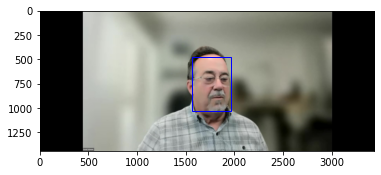

In [7]:

### BOUNDING BOX REGRESSION

 
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='blue')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	pyplot.show()
 
filename = '3984.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

1/1 [==============================] - 0s 149ms/step


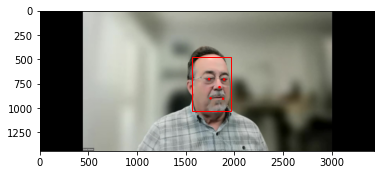

In [8]:
### FACIAL LANDMARK DETECTION

 
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
		# draw the dots
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=8, color='red')
			ax.add_patch(dot)
	# show the plot
	pyplot.show()
 
filename = '3984.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

1/1 [==============================] - 0s 172ms/step


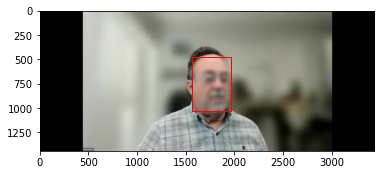

In [9]:
### BLURRING FACE USING OPENCV

filename = '3984.jpg'
img = pyplot.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(img)
copy = img.copy()
# Create figure and axes
fig, ax = plt.subplots()


for face in faces:
    x,y,w,h = face['box']

    # Create a Rectangle patch
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
    
    roi = img[y:y+h, x:x+w]
    roi = cv2.blur(roi, (50,50))
    # impose this blurred image on original image to get final image
    copy[y:y+roi.shape[0], x:x+roi.shape[1]] = roi

# Display the image
ax.imshow(copy)

plt.show()

In [ ]:
import cv2
from mtcnn import MTCNN

cap = cv2.VideoCapture(0)
detector = MTCNN()

while True:

    ret,frame = cap.read()

    output = detector.detect_faces(frame)

    for single_output in output:
        x,y,width,height = single_output['box']
        cv2.rectangle(frame,pt1=(x,y),pt2=(x+width,y+height),color=(255,0,0),thickness=3)

    cv2.imshow('win',frame)

    if cv2.waitKey(1) & 0xFF == ord('x'):
        break

cv2.destroyAllWindows()